Tests SMC Logistic regression on toy dataset with two features

In [14]:
import numpy as np
from logistic_sequential import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import sklearn

In [15]:
data_train = pd.read_csv('/scratch/nyu/mcmc/proj/data/Occupancy-detection-data/datatraining.txt')
data_test = pd.read_csv('/scratch/nyu/mcmc/proj/data/Occupancy-detection-data/datatest.txt')

In [16]:
n_features = 6

In [17]:
feat_cols = ['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']


In [18]:
data = np.array(data_train[feat_cols])

In [29]:
clf = LogisticRegression(n_iter=5000)
clf.partial_fit(n_features=n_features,labels=[0,1])

In [33]:
clf_stand = sklearn.linear_model.LogisticRegression(C=10000000)
clf_stand.fit(data_train[['Temperature','Humidity','Light','CO2','HumidityRatio']],data_train.Occupancy)

LogisticRegression(C=10000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
clf_stand.score(data_test[['Temperature','Humidity','Light','CO2','HumidityRatio']],data_test.Occupancy)

0.97823639774859283

In [ ]:
clf_stand.score(data_train[['Temperature','Humidity','Light','CO2','HumidityRatio']],data_train.Occupancy)

In [30]:
ps = []
for i,row in enumerate(data):
    X = np.expand_dims(row[:-1],0)
    y = np.expand_dims(row[-1],0)
    clf.partial_fit(X,y)
    ps.append(clf.predict(X))
    print i,", ",clf.score(X,y),": ",y

0 ,  1.0 :  [ 1.]
1 ,  1.0 :  [ 1.]
2 ,  1.0 :  [ 1.]
3 ,  1.0 :  [ 1.]
4 ,  1.0 :  [ 1.]
5 ,  1.0 :  [ 1.]
6 ,  1.0 :  [ 1.]
7 ,  1.0 :  [ 1.]
8 ,  1.0 :  [ 1.]
9 ,  1.0 :  [ 1.]
10 ,  1.0 :  [ 1.]
11 ,  1.0 :  [ 1.]
12 ,  1.0 :  [ 1.]
13 ,  1.0 :  [ 1.]
14 ,  1.0 :  [ 1.]
15 ,  1.0 :  [ 1.]
16 ,  1.0 :  [ 0.]
17 ,  1.0 :  [ 0.]
18 ,  1.0 :  [ 0.]
19 ,  1.0 :  [ 0.]
20 ,  1.0 :  [ 0.]
21 ,  1.0 :  [ 0.]
22 ,  1.0 :  [ 0.]
23 ,  1.0 :  [ 0.]
24 ,  1.0 :  [ 0.]
25 ,  1.0 :  [ 0.]
26 ,  1.0 :  [ 0.]
27 ,  1.0 :  [ 0.]
28 ,  1.0 :  [ 0.]
29 ,  1.0 :  [ 0.]
30 ,  1.0 :  [ 0.]
31 ,  1.0 :  [ 0.]
32 ,  1.0 :  [ 0.]
33 ,  1.0 :  [ 0.]
34 ,  1.0 :  [ 0.]
35 ,  1.0 :  [ 0.]
36 ,  1.0 :  [ 0.]
37 ,  1.0 :  [ 0.]
38 ,  1.0 :  [ 0.]
39 ,  1.0 :  [ 0.]
40 ,  1.0 :  [ 0.]
41 ,  1.0 :  [ 0.]
42 ,  1.0 :  [ 0.]
43 ,  1.0 :  [ 0.]
44 ,  1.0 :  [ 0.]
45 ,  1.0 :  [ 0.]
46 ,  1.0 :  [ 0.]
47 ,  1.0 :  [ 0.]
48 ,  1.0 :  [ 0.]
49 ,  1.0 :  [ 0.]
50 ,  1.0 :  [ 0.]
51 ,  1.0 :  [ 0.]
52 ,  1.0 :  [ 0.]
53 

KeyboardInterrupt: 

In [6]:
clf = LogisticRegression(n_iter=10000)
clf.partial_fit(n_features=3)

In [50]:
X_stat = data_static[:,1:-1]
y_stat = data_static[:,-1]

In [29]:
clf.partial_fit(X_stat,y_stat)

In [30]:
clf.score(X_stat,y_stat)

0.98888888888888893

In [36]:
clf.coef_[0]

1.1084271130012116

In [46]:
def calc_y(coef,intercept,x):
    m = -coef[0]/coef[1]
    b = -(intercept/coef[1])
    return m*x+b

In [47]:
pts = [-0.3,0.5]
y = [calc_y(clf.coef_,clf.intercept_,x) for x in pts]

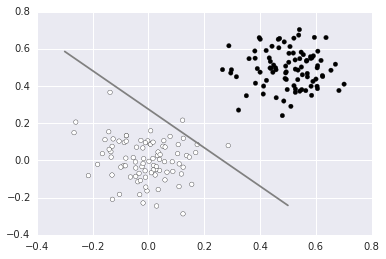

In [48]:
plt.scatter(X_stat[:,0],X_stat[:,1],c=y_stat.astype(int))
plt.plot(pts,y,c='grey')